 Imported the necessary libraries

In [15]:

import face_recognition
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
#Initialised all variables
unknown_dir="unknown"
known_dir="Known"
Tolerance=0.6
Frame_thickness=3
Font_thickness=2
Model="cnn"


#MY "known_dir" contains two folders namely deepika and priyanka with thier respective photos.ALso Used a Convolutional neural network model(CNN) instead of Histogram of Oriented Gradients(HOG) feature descriptor.

In [7]:
#STORING ALL THE KNOWN FACE ENCODING WITH FIRST FACE AND ITS CORRESPONDING NAMES
print("Loading ALREADY KNOWN FACES")
known_faces=[]
known_names=[]
for name in os.listdir(known_dir):
    for fname in os.listdir(f"{known_dir}/{name}"):
        image=face_recognition.load_image_file(f"{known_dir}/{name}/{fname}")
        encoding=face_recognition.face_encodings(image)[0]
        known_faces.append(encoding)
        known_names.append(name)


    

Loading ALREADY KNOWN FACES


Found 2 face in input img are 


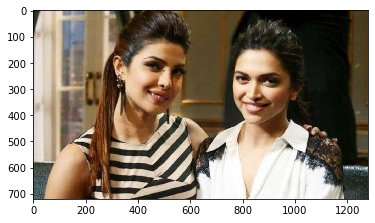

In [17]:
#SHOWING UNKNOWN FACES PRESENT IN UNKNOWN DIRECTORY

image=cv2.imread("unknown\priyankachopra-deepikapadukonesocialmedia.jpg")
image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
plt.imshow(image)

face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face in input img are ".format(number_of_faces))

    

A face is located at:736,217,959,440 pixel location
A face is located at:390,142,613,365 pixel location


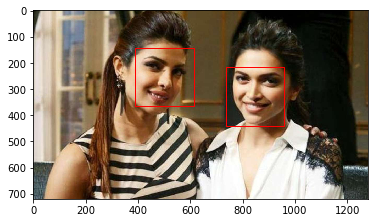

In [21]:
from matplotlib.patches import Rectangle
plt.imshow(image)
ax=plt.gca()
for fc in face_locations:
    top,right,bot,left=fc
    x,y,w,h=left,top,right,bot
    print("A face is located at:{},{},{},{} pixel location".format(x,y,w,h))
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='red')
    ax.add_patch(rect)
    
plt.show()

In [13]:
#There were 5 unknown pictures one of which was of katrina kaif.
print("Iterating unknown faces")
for filename in os.listdir(unknown_dir):
    print(filename)
    image=face_recognition.load_image_file(f"{unknown_dir}/{filename}")
    locations=face_recognition.face_locations(image,model=Model)
    encodings=face_recognition.face_encodings(image,locations)
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    for face_encoding,face_location in zip(encodings,locations):
        results=face_recognition.compare_faces(known_faces,face_encoding,Tolerance)
        match=None
        if True in results:
            match=known_names[results.index(True)]
            print(f"Match found:{match}")
            
            top_left=(face_location[3],face_location[0])
            bottom_right=(face_location[1],face_location[2])
            
            color=[255,0,0]
            cv2.rectangle(image,top_left,bottom_right,color,3)
            top_left=(face_location[3],face_location[2])
            bottom_right=(face_location[1],face_location[2]+22)
            cv2.rectangle(image,top_left,bottom_right,color,cv2.FILLED)
            cv2.putText(image,match,(face_location[3]+10,face_location[2]+15),cv2.FONT_HERSHEY_SIMPLEX,0.5,(200,200,200),Font_thickness)
    
    cv2.imshow(filename,image)
    cv2.waitKey(10000)
    cv2.destroyWindow(filename)
        

Iterating unknown faces
914738-priyankachopra-deepikapadukone-fakesocialmedia.jpg
Match found:priyanka
Match found:deepika
Katrina_Kaif_at_SIIMA_2017.jpg
padukone_launches_her_website_on_birthday.jpg
Match found:deepika
pri.jpg
Match found:priyanka
pri2.jpg
Match found:deepika


#RESULTS:
The face recognition model accurately distinguishes between the two actresses except for one picture.